# Paper "Discovering architecture-aware and sound process models of multi-agent systems: a compositional approach"


#### Further References:

- https://zenodo.org/records/5830863
- https://dl.acm.org/doi/10.1007/s10270-022-01008-x


In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import sys

import pm4py


sys.path.append("/workspaces/university-petri-nets/")
from university_petri_nets.compositional_algorithm.algorithm_utils.filter_logs import (
    filter_logs_by_agent,
)
from university_petri_nets.compositional_algorithm.interface_patterns.interface_patterns import (
    IP1,
)
from university_petri_nets.compositional_algorithm.transformations.transformations import (
    P1,
)

In [30]:
# Load the event log
df_log = pm4py.read_xes(
    "/workspaces/university-petri-nets/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_initial_log.xes",
)

parsing log, completed traces ::   0%|          | 0/5000 [00:00<?, ?it/s]

/usr/local/lib/python3.12/site-packages/pm4py/objects/petri_net/importer/variants/pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


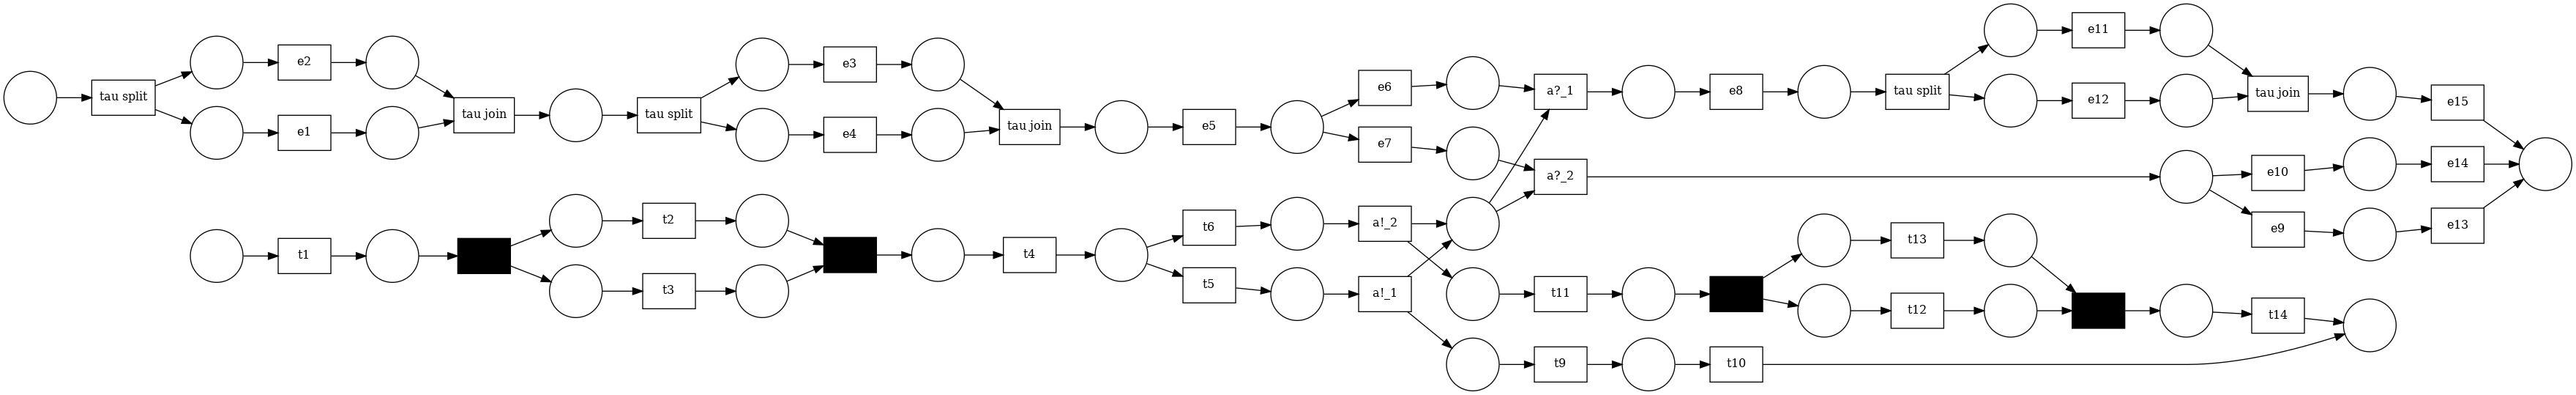

In [31]:
# compositionally mined process model
pn_coposition_mined, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_composition_mined.pnml",
)
pm4py.view_petri_net(pn_coposition_mined)

#### Algorithm Composition

If there is a mapping of an agent GWF-net to the corresponding part in an `interface pattern` (shown by dashed arcs in Fig. 3), we can replace this abstract part with the agent GWF-net. As a result, we obtain a sound process model of a multi-agent system, provided that we manage to find a mapping for every agent GWF-net.

The compositional process discovery algorithm (see Algorithm 1) reflects the main steps of the general scheme of the approach shown in Fig. 3:

1. Discover(LΛ ) corresponds to the application of the i
   process discovery algorithm to agent sub-logs. It is important to obtain sound GWF-nets at this step. For instance, the Inductive miner [13] guarantees the sound- ness of discovered models (Done in Step 2).
2. isRefinement(Ri,Ai)checks if the agent GWF-net, Ri, is a proper refinement of the corresponding part, Ai , in the interface pattern.
3. Replace(S, Ai , Ri ) substitutes the corresponding part, Ai , in the interface pattern with the agent GWF-net, Ri , discovered from LΛi

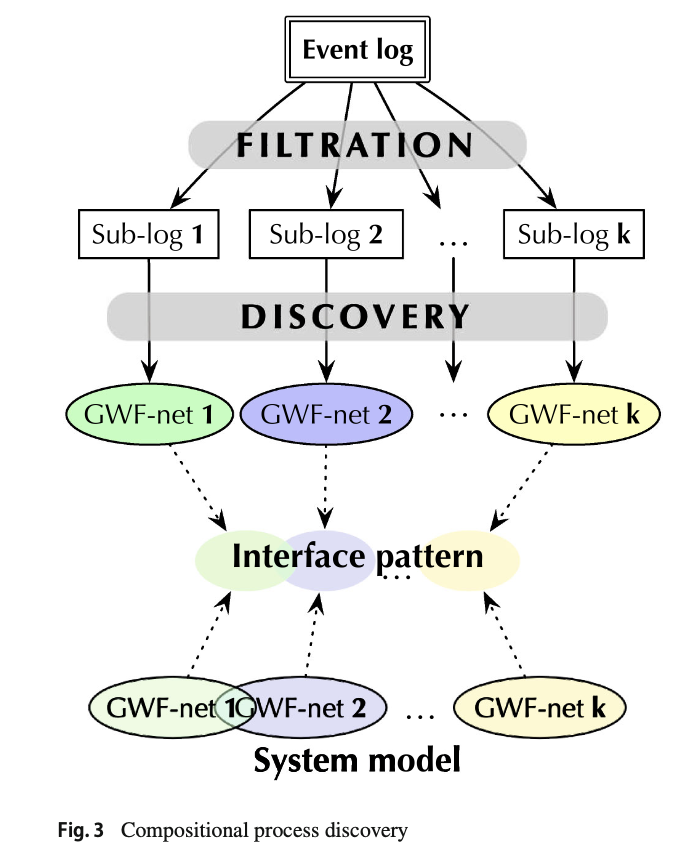


##### 0. Filtration

An event log of a multi-agent system is filtered by actions executed by different agents. Correspondingly, we construct a set of sub-logs. For instance, filtering the records in the event log given in Table 1 by the “Pete” value of the “Agent” attribute, we obtain the sub-log presented in Table 2.

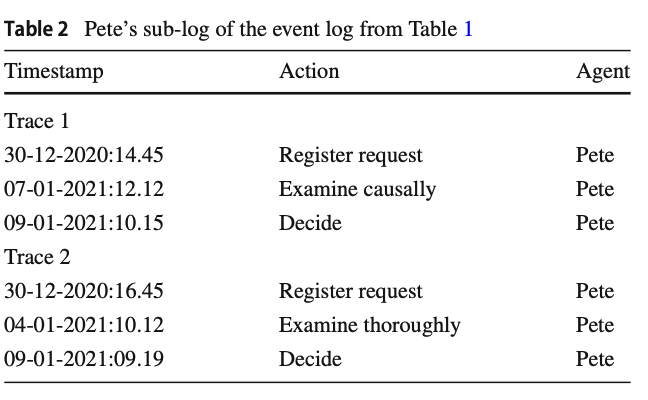


In [32]:
# dict of pandas dataframes with agent as key
set_sublogs = filter_logs_by_agent(df_log, "org:resource")
display(set_sublogs["Agent 1"])

,org:resource,concept:name,lifecycle:transition,time:timestamp,case:concept:name
0,Agent 1,t1,complete,2021-03-01 17:07:19+00:00,Trace 1
3,Agent 1,t3,complete,2021-03-01 18:54:54+00:00,Trace 1
4,Agent 1,t2,complete,2021-03-01 19:20:48+00:00,Trace 1
7,Agent 1,t4,complete,2021-03-01 21:34:29+00:00,Trace 1
10,Agent 1,t5,complete,2021-03-01 23:51:06+00:00,Trace 1
...,...,...,...,...,...
95042,Agent 1,a!_2,complete,2021-03-02 01:17:23+00:00,Trace 5000
95043,Agent 1,t11,complete,2021-03-02 03:04:45+00:00,Trace 5000
95046,Agent 1,t12,complete,2021-03-02 05:08:56+00:00,Trace 5000
95047,Agent 1,t13,complete,2021-03-02 05:10:58+00:00,Trace 5000


##### 1. Discovery

We discover agent GWF-nets from corresponding sub-logs constructed at the filtration step. Discovered S
GWF-nets should be sound. The `Inductive miner`, mentioned above, discovers sound models.


Creating Petri net for Agent 1


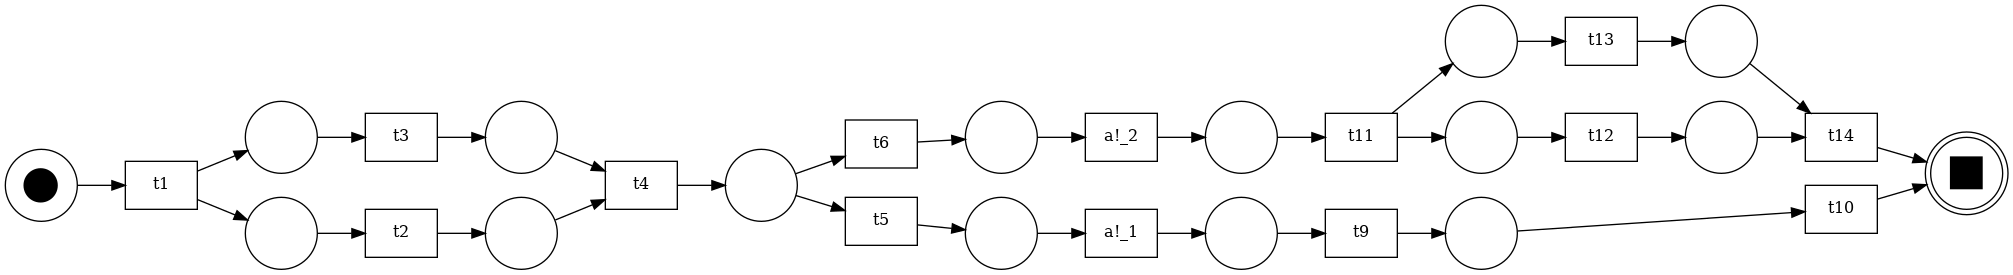

Creating Petri net for Agent 2


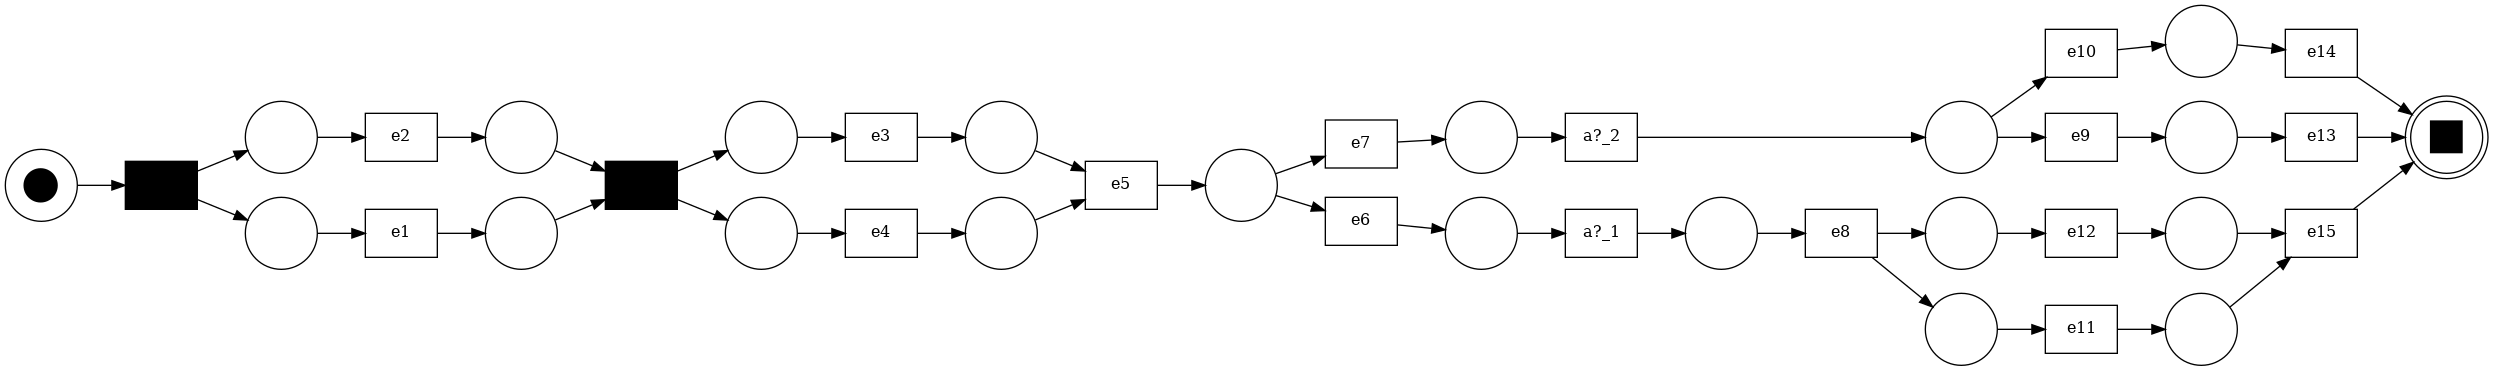

In [33]:
# for each of the filtered logs, create a gwf net with the induction miner
for agent, df_sublog in set_sublogs.items():
    # Convert the dataframe to an event log
    print(f"Creating Petri net for {agent}")
    net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(df_sublog)
    pm4py.view_petri_net(net, initial_marking, final_marking)

##### Visualize Interface Pattern IP-1


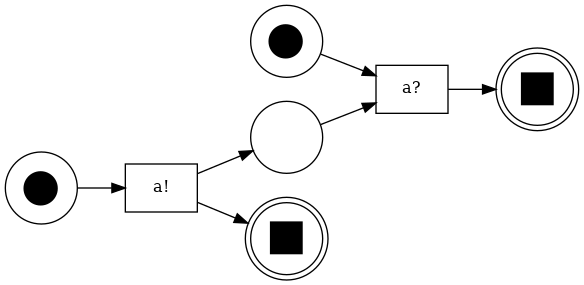

In [34]:
IP1 = IP1()
ip1_net, ip1_initial_marking, ip1_final_marking = IP1.get_net()
pm4py.view_petri_net(ip1_net, ip1_initial_marking, ip1_final_marking)

##### 2. Refinement


##### 3. Replace
